We wondered if females biked less at night then men did. We know females bike less than males on average (graph), but want to see if even controlling for differnces in overall biking population size females were less likely to ride at night.

<br>
Fn : Female night
<br>
Fd : Female day
<br>
Fa : Female overall (Fn+Fd)
<br>
Mn : Male night
<br>
Md : Male day
<br>
Ma : Male overall (Mn+Md)

<br> 
Null Hypothesis : Fn/Fa = Mn/Ma or Fn/Fa > Mn/Ma
<br> 
Alternative Hypothesis: Fn/Fa < Mn/Ma


Where data is coming from: 

Months Used: 


In [3]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import statsmodels as st
import os
import matplotlib as plt
import statsmodels.formula.api as smf
from pandas import DataFrame
from datetime import datetime
from time import time
#from getCitiBikeCSV import getCitiBikeCSV
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
#download the dataset into PUIDATA and upzip the files
os.system("curl -O https://s3.amazonaws.com/tripdata/201701-citibike-tripdata.csv.zip")
os.system("unzip 201701-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201702-citibike-tripdata.csv.zip")
os.system("unzip 201702-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201703-citibike-tripdata.csv.zip")
os.system("unzip 201703-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201704-citibike-tripdata.csv.zip")
os.system("unzip 201704-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))


0

In [6]:
os.system("curl -O https://s3.amazonaws.com/tripdata/201705-citibike-tripdata.csv.zip")
os.system("unzip 201705-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201706-citibike-tripdata.csv.zip")
os.system("unzip 201706-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201707-citibike-tripdata.csv.zip")
os.system("unzip 201707-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201708-citibike-tripdata.csv.zip")
os.system("unzip 201708-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

256

In [2]:
#read the data
jan = pd.read_csv( os.getenv("PUIDATA") + "/201701-citibike-tripdata.csv")
feb = pd.read_csv( os.getenv("PUIDATA") + "/201702-citibike-tripdata.csv")
march = pd.read_csv( os.getenv("PUIDATA") + "/201703-citibike-tripdata.csv")
april = pd.read_csv( os.getenv("PUIDATA") + "/201704-citibike-tripdata.csv")
may = pd.read_csv( os.getenv("PUIDATA") + "/201705-citibike-tripdata.csv")
june = pd.read_csv( os.getenv("PUIDATA") + "/201706-citibike-tripdata.csv")
july = pd.read_csv( os.getenv("PUIDATA") + "/201707-citibike-tripdata.csv")
aug = pd.read_csv( os.getenv("PUIDATA") + "/201708-citibike-tripdata.csv")
#sep = pd.read_csv( os.getenv("PUIDATA") + "/201709-citibike-tripdata.csv")

In [9]:
aug.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2110,2017-08-01 00:00:00,2017-08-01 00:35:11,470,W 20 St & 8 Ave,40.743453,-74.000040,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,20954,Subscriber,1978.0,2
1,160,2017-08-01 00:00:10,2017-08-01 00:02:51,348,W Broadway & Spring St,40.724910,-74.001547,151,Cleveland Pl & Spring St,40.722104,-73.997249,15164,Subscriber,1978.0,1
2,1644,2017-08-01 00:00:17,2017-08-01 00:27:41,3165,Central Park West & W 72 St,40.775794,-73.976206,3320,Central Park West & W 100 St,40.793393,-73.963556,17540,Subscriber,1962.0,2
3,323,2017-08-01 00:00:27,2017-08-01 00:05:51,389,Broadway & Berry St,40.710446,-73.965251,3073,Division Ave & Hooper St,40.706913,-73.954417,18705,Subscriber,1990.0,1
4,109,2017-08-01 00:00:41,2017-08-01 00:02:31,3145,E 84 St & Park Ave,40.778627,-73.957721,3147,E 85 St & 3 Ave,40.778012,-73.954071,27975,Subscriber,1983.0,1


In [8]:
aug.shape

(1816498, 15)

In [3]:
#rename the irrelevant columns into alphabet letters.
months = [jan, feb, march, april, may, june, july, aug]

for i in months:
    i.columns = ['a', 'starttime','stoptime','b','c','d', 'e','f', 'g', 'h', 'i', 'j', 'k', 'l','gender']

In [4]:
##Marium wrote this part. create a list contains the name of all dataframes. drop the irrelevant columns.

dropp= ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

for i in months:
    i.drop(dropp, inplace = True, axis = 1)


In [5]:
monthname = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'aug']
for i,e in enumerate(months):
    e['month'] = monthname[i]

In [6]:
allmonths = pd.concat(months)

In [7]:
allmonths.head()

,starttime,stoptime,gender,month
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan
1,2017-01-01 00:00:45,2017-01-01 00:22:08,2,jan
2,2017-01-01 00:00:57,2017-01-01 00:11:46,0,jan
3,2017-01-01 00:01:10,2017-01-01 00:11:42,0,jan
4,2017-01-01 00:01:25,2017-01-01 00:11:47,0,jan


In [8]:
allmonths.shape

(10368351, 4)

In [22]:
#the dataset is too big, select 5% of the orginal one to do further analysis
df2 = allmonths[::20]

In [23]:
df2.head()

,starttime,stoptime,gender,month
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan
20,2017-01-01 00:10:11,2017-01-01 00:16:02,2,jan
40,2017-01-01 00:14:55,2017-01-01 00:24:48,1,jan
60,2017-01-01 00:18:06,2017-01-01 00:27:31,2,jan
80,2017-01-01 00:22:36,2017-01-01 00:53:14,1,jan


In [11]:
df2.shape

(518418, 4)

In [24]:
df2['time']= df2['starttime'].apply(lambda x : pd.to_datetime(x).time())

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
import datetime as dt

nightstart = dt.datetime.strptime('19:00:00', '%H:%M:%S').time()
#7pm
nightend = dt.datetime.strptime('05:00:00', '%H:%M:%S').time()
#5am

In [26]:
def time_checker(t):
    if t > nightstart:
        return 'Night Rider'
    if t < nightend:
        return 'Night Rider'
    else:
        return 'Day Rider'

In [27]:
df2['typeofrider'] = df2['time'].apply(lambda x: time_checker(x))
df2.head()


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,starttime,stoptime,gender,month,time,typeofrider
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan,00:00:21,Night Rider
20,2017-01-01 00:10:11,2017-01-01 00:16:02,2,jan,00:10:11,Night Rider
40,2017-01-01 00:14:55,2017-01-01 00:24:48,1,jan,00:14:55,Night Rider
60,2017-01-01 00:18:06,2017-01-01 00:27:31,2,jan,00:18:06,Night Rider
80,2017-01-01 00:22:36,2017-01-01 00:53:14,1,jan,00:22:36,Night Rider


In [1]:
#https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas
df2.to_csv('df2hw7.csv' ,  index = False)


NameError: name 'df2' is not defined

In [78]:
cmd = "mv df2hw7.csv " + os.getenv("PUIDATA")

os.system(cmd)

0

In [ ]:
'''all data cleaning done: saving to new CSV for easy access'''

In [4]:
df3 = pd.read_csv(os.getenv("PUIDATA") + '/df2hw7.csv')

In [5]:
df3.head()

,starttime,stoptime,gender,month,time,typeofrider
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan,00:00:21,Night Rider
1,2017-01-01 00:10:11,2017-01-01 00:16:02,2,jan,00:10:11,Night Rider
2,2017-01-01 00:14:55,2017-01-01 00:24:48,1,jan,00:14:55,Night Rider
3,2017-01-01 00:18:06,2017-01-01 00:27:31,2,jan,00:18:06,Night Rider
4,2017-01-01 00:22:36,2017-01-01 00:53:14,1,jan,00:22:36,Night Rider


Populating the interactive namespace from numpy and matplotlib


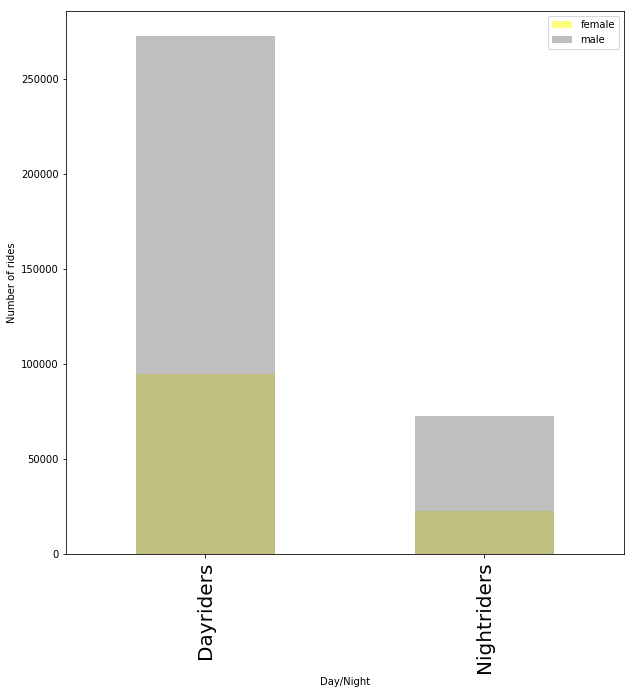

In [7]:
#https://github.com/fedhere/PUI2017_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb


%pylab inline

fig = pl.figure(figsize(10,10))

norm_w = 1
(df3['typeofrider'][df3['gender'] == 2].groupby([df3.typeofrider]).count()/ norm_w).plot(kind="bar",color='Yellow', alpha=0.5, label='female')

norm_m = 1
ax = (df3['typeofrider'][df3['gender'] == 1].groupby([df3.typeofrider]).count()/ norm_m).plot(kind="bar", color='Grey', alpha=0.5, label='male')
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day/Night")
ax.xaxis.set_ticklabels(['Dayriders','Nightriders'], fontsize=20)
pl.legend()

In [10]:
counts_w = df3.typeofrider[df3.gender == 2].groupby([df3.typeofrider]).count()
error_w = np.sqrt(counts_w)
counts_m = df3.typeofrider[df3.gender == 1].groupby([df3.typeofrider]).count()
error_m = np.sqrt(counts_m)

In [11]:
counts_w

typeofrider
Day Rider      94547
Night Rider    22527
Name: typeofrider, dtype: int64

In [16]:
counts_m

typeofrider
Day Rider      272131
Night Rider     72403
Name: typeofrider, dtype: int64

In [12]:
norm_w = counts_w.sum()
norm_m = counts_m.sum()

Men: day:0.790, night:0.210, day error:0.002, night error:0.001
Women: day:0.808, night:0.192, day error:0.003, night error:0.001


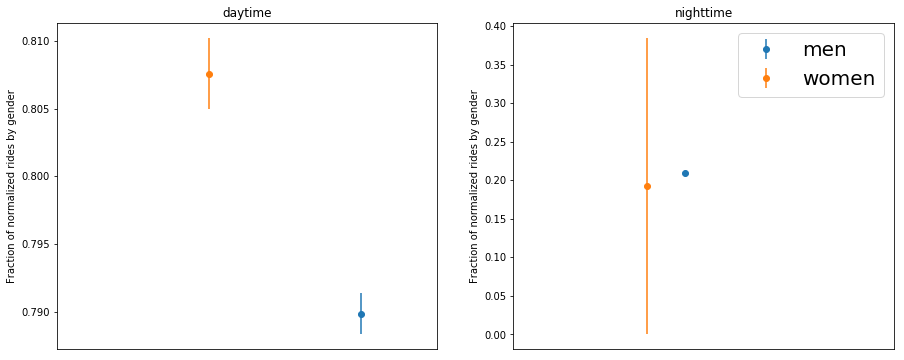

In [13]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

day_w = sum(counts_w[0]) * 1.0 / norm_w  #fraction of women riding on days
night_w = sum(counts_w[1]) * 1.0 / norm_w  #fraction of women riding on nights
eday_w = np.sqrt(sum(error_w[0]**2)) / norm_w  #error on fraction number of women riding on days
enight_w = np.sqrt(sum(error_w[1]**2)) / norm_w #error on fraction number of women riding on nights

#same nomenclature as above
day_m = sum(counts_m[0]) * 1.0 / norm_m
night_m = sum(counts_m[1]) * 1.0 / norm_m
eday_m = np.sqrt(sum(error_m[0]**2)) / norm_m
enight_m = np.sqrt(sum(error_m[1]**2)) / norm_m

print("Men: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_m, night_m, eday_m, enight_m))
print("Women: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_w, night_w, eday_w, enight_w))

ax1.errorbar([0.4], [day_m], yerr=[eday_m], fmt='o', label='men')
ax1.errorbar([0.2], [day_w], yerr=[eday_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [night_m], yerr=[enight_m], fmt='o', label='men')
ax2.errorbar([0.2], [night_w], yerr=[night_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("daytime")
ax2.set_title("nighttime")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

Populating the interactive namespace from numpy and matplotlib


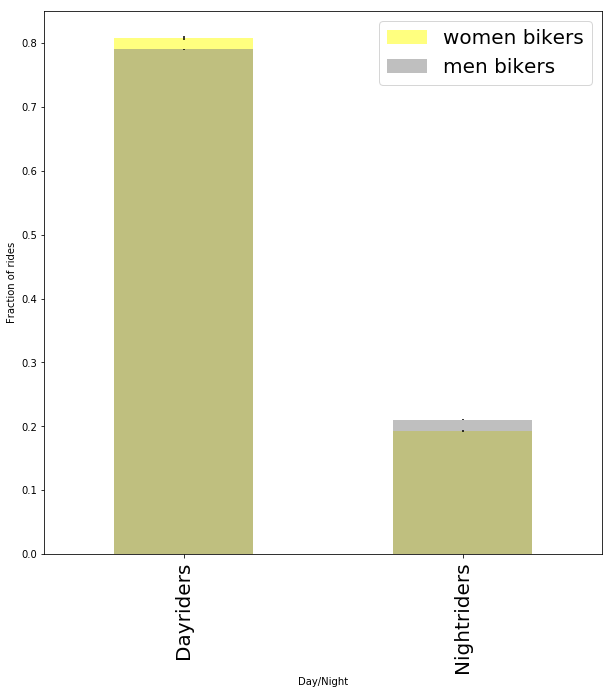

In [17]:
%pylab inline

#absolute counts, with statistical errors #normalized

fig = pl.figure(figsize(10,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='Yellow',alpha=0.5,  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='Grey', label='men bikers')

ax.xaxis.set_ticklabels(['Dayriders','Nightriders'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day/Night")

pl.legend(['women bikers','men bikers'],fontsize=20)

## Figure 1: Fraction of Citibike bikers per gender from Jan to Aug in 2017 for week daytime (left) and nightime(right)

### Is the percentage of women that ride on nighttime lower or equal to that of man?
## The statistics is: 
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation 
# $p_0 = \frac{W_{\mathrm{night}}}{W_{\mathrm{total}}}$
### and 
# $p_1 = \frac{M_{\mathrm{night}}}{M_{\mathrm{total}}}$


"Given the experiment conditions, where the objective is to compare means of continuous variables (without an inteligible standard deviation because values can only take "Nightime" or "Daytime"), with a large sample for all groups I would recommend using a T test or a Pearson test."

Note from review^

In [14]:
day_w = sum(counts_w[0]) * 1.0 / norm_w  #fraction of women riding on week days
night_w = sum(counts_w[1]) * 1.0 / norm_w  #fraction of women riding on weekends

In [15]:
P0mP1 = night_w - night_m
print ("difference between man and women: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between man and women on weekend:  -0.0177308576355
In accordance with Null Hypothesis
